# Feature Engineering by Correlation for Sinkhole Risk Intelligence

This notebook is created to identify features that have a high correlation to sinkhole prediction. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Mount drive and connect to location with training data.

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!ls

drive  sample_data


In [ ]:
cd 'drive/MyDrive/w210-sinkhole-risk-intelligence/11-Model Generation'

/content/drive/MyDrive/w210-sinkhole-risk-intelligence/11-Model Generation


In [ ]:
!ls

 BayeNetOnlyCode.ipynb	'Sinkhole ML Models Tracker.gsheet'
 data_model1_0.csv	 Test_incomplete_Bayes.ipynb
 data_model1_365.csv	 w210_Generate_Model_Final_2.ipynb
 data_model1_60.csv	 w210_model_library.py


## Load training data to dataframes

In [ ]:
# Training data based on satellite imagery from 365 days before reported events
df_365 = pd.read_csv('data_model1_365.csv')
df_365.shape

(222, 81)

In [ ]:
# Training data based on satellite imagery from 60 days before reported events
df_60 = pd.read_csv('data_model1_60.csv')
df_60.shape

(222, 81)

In [ ]:
# Training data based on satellite imagery on dates of reported events
df_0 = pd.read_csv('data_model1_0.csv')
df_0.shape

(222, 81)

In [ ]:
# Inspect data columns
df_365.columns

Index(['name_x', 'DateD', 'Key', 'imgnum', 'Sinkhole', 'Group', 'ID', 'lon_t',
       'lat_t_x', 'geometry', 'AnnualCrop', 'Forest', 'HerbaceousVegetation',
       'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential',
       'River', 'SeaLake', 'prediction', 'prediction_name', 'l25', 'l50',
       'l75', 'l100', 'l150', 'l200', 'l250', 'l300', 'l500', 'l750', 'l1000',
       'l1000plus', 'coloc', 'Y25', 'Y50', 'Y75', 'Y100', 'Y150', 'Y200',
       'Y250', 'Y300', 'Y500', 'Y750', 'Y1000', 'Y1000plus', 'Ycoloc',
       'Key_ws', 'ws_name', 'lon_w', 'lat_w', 'County', 'Calcium Carbonate',
       'Gypsum', 'Soil Health Organic Matter', 'Percent Clay', 'Percent Sand',
       'Percent Silt', 'Available Water Storage', 'rolling_7_precip',
       'rolling_15_precip', 'rolling_30_precip', 'rolling_60_precip',
       'rolling_90_precip', 'y1_mean_prc', 'y1_max_prc', 'y1_mean_tmp',
       'y1_max_tmp', 'y1_min_tmp', 'y2_mean_prc', 'y2_max_prc', 'y2_mean_tmp',
       'y2_max_tmp', 'y

In [ ]:
# Create feature dataframe from df_365
X_365 = df_365.drop(["Sinkhole",
                     "DateD", 
                     "name_x",
                     "Key",  
                     "imgnum",
                     "ID",
                     "Key_ws",
                     "ws_name",
                     "geometry",
                     "prediction_name", 
                     "County"
                     ], axis=1) # Drop target and other irrelevant features
# Create target dataframe for Sinkhole labels
y_365 = df_365["Sinkhole"]

In [ ]:
# Check resulting feature dataframe
print(X_365.head(1))
print(X_365.shape)

   Group      lon_t    lat_t_x    AnnualCrop    Forest  HerbaceousVegetation  \
0      0 -82.767929  28.086593  6.280279e-09  0.000242              0.970496   

    Highway  Industrial       Pasture  PermanentCrop  ...  y2_max_prc  \
0  0.000757    0.000048  1.103631e-12   2.557225e-07  ...         0.0   

   y2_mean_tmp  y2_max_tmp  y2_min_tmp  y3_mean_prc  y3_max_prc  y3_mean_tmp  \
0    68.280274        85.0        38.9          0.0         0.0    73.796164   

   y3_max_tmp  y3_min_tmp  gridcode  
0        88.1        41.8         2  

[1 rows x 70 columns]
(222, 70)


In [ ]:
for i in range(len(X_365.columns)):
  print(f'feature: {X_365.columns[i]}, value:{X_365[X_365.columns[i]][0]}')

feature: Group, value:0
feature: lon_t, value:-82.7679289558445
feature: lat_t_x, value:28.0865926629496
feature: AnnualCrop, value:6.280279e-09
feature: Forest, value:0.00024212533
feature: HerbaceousVegetation, value:0.9704962
feature: Highway, value:0.0007571444
feature: Industrial, value:4.7912774e-05
feature: Pasture, value:1.1036305e-12
feature: PermanentCrop, value:2.5572248e-07
feature: Residential, value:1.3543962e-11
feature: River, value:0.020681499
feature: SeaLake, value:0.0077749677
feature: prediction, value:2
feature: l25, value:0
feature: l50, value:2
feature: l75, value:5
feature: l100, value:6
feature: l150, value:9
feature: l200, value:17
feature: l250, value:19
feature: l300, value:24
feature: l500, value:44
feature: l750, value:67
feature: l1000, value:102
feature: l1000plus, value:3860
feature: coloc, value:0
feature: Y25, value:0
feature: Y50, value:62
feature: Y75, value:136
feature: Y100, value:172
feature: Y150, value:263
feature: Y200, value:572
feature: Y25

In [ ]:
# Check resulting target dataframe
y_365.head(5)
print(y_365.shape)

(222,)


## Dataset with satellite data 365 days prior to the respective historical sinkhole events

### Perform train/test split

In [ ]:
# Perform train/test split
#from sklearn.model_selection import train_test_split
X_365_train, X_365_test, y_365_train, y_365_test = train_test_split(
    X_365,
    y_365,
    test_size = 0.2,
    random_state = 0)

In [ ]:
X_365_train.shape

(177, 70)

### Identify and remove constant features

In [ ]:
# Create constant filter
constant_filter_365 = VarianceThreshold(threshold=0.1)
constant_filter_365.fit(X_365_train)

VarianceThreshold(threshold=0.1)

In [ ]:
# Find number of non-constant features
len(X_365_train.columns[constant_filter_365.get_support()])

56

In [ ]:
# Find all non-constant features
non_constant_features = X_365_train.columns[constant_filter_365.get_support()]
print(non_constant_features)
print(f'Number of non-constant features is: {len(non_constant_features)}')

Index(['Group', 'lon_t', 'lat_t_x', 'Forest', 'SeaLake', 'prediction', 'l25',
       'l50', 'l75', 'l100', 'l150', 'l200', 'l250', 'l300', 'l500', 'l750',
       'l1000', 'l1000plus', 'Y25', 'Y50', 'Y75', 'Y100', 'Y150', 'Y200',
       'Y250', 'Y300', 'Y500', 'Y750', 'Y1000', 'Y1000plus', 'lon_w', 'lat_w',
       'Calcium Carbonate', 'Soil Health Organic Matter', 'Percent Clay',
       'Percent Sand', 'Percent Silt', 'Available Water Storage',
       'rolling_7_precip', 'rolling_15_precip', 'rolling_30_precip',
       'rolling_60_precip', 'rolling_90_precip', 'y1_max_prc', 'y1_mean_tmp',
       'y1_max_tmp', 'y1_min_tmp', 'y2_max_prc', 'y2_mean_tmp', 'y2_max_tmp',
       'y2_min_tmp', 'y3_max_prc', 'y3_mean_tmp', 'y3_max_tmp', 'y3_min_tmp',
       'gridcode'],
      dtype='object')
Number of non-constant features is: 56


In [ ]:
# Find all constant features
constant_features = X_365.columns[~X_365.columns.isin(non_constant_features)]
print(constant_features)
print(f'Number of constant features is: {len(constant_features)}')

Index(['AnnualCrop', 'HerbaceousVegetation', 'Highway', 'Industrial',
       'Pasture', 'PermanentCrop', 'Residential', 'River', 'coloc', 'Ycoloc',
       'Gypsum', 'y1_mean_prc', 'y2_mean_prc', 'y3_mean_prc'],
      dtype='object')
Number of constant features is: 14


In [ ]:
# Drop constant features
X_365_no_constant = X_365.drop(constant_features, axis=1)
X_365_no_constant.shape

(222, 56)

### Identify and remove highly correlated features

In [ ]:
# Create correlation matrix with X_365_train data
corr_365 = X_365_no_constant.corr()

In [ ]:
# Create color palette for plotting results
custom_map = sns.diverging_palette(230, 20, as_cmap=True)

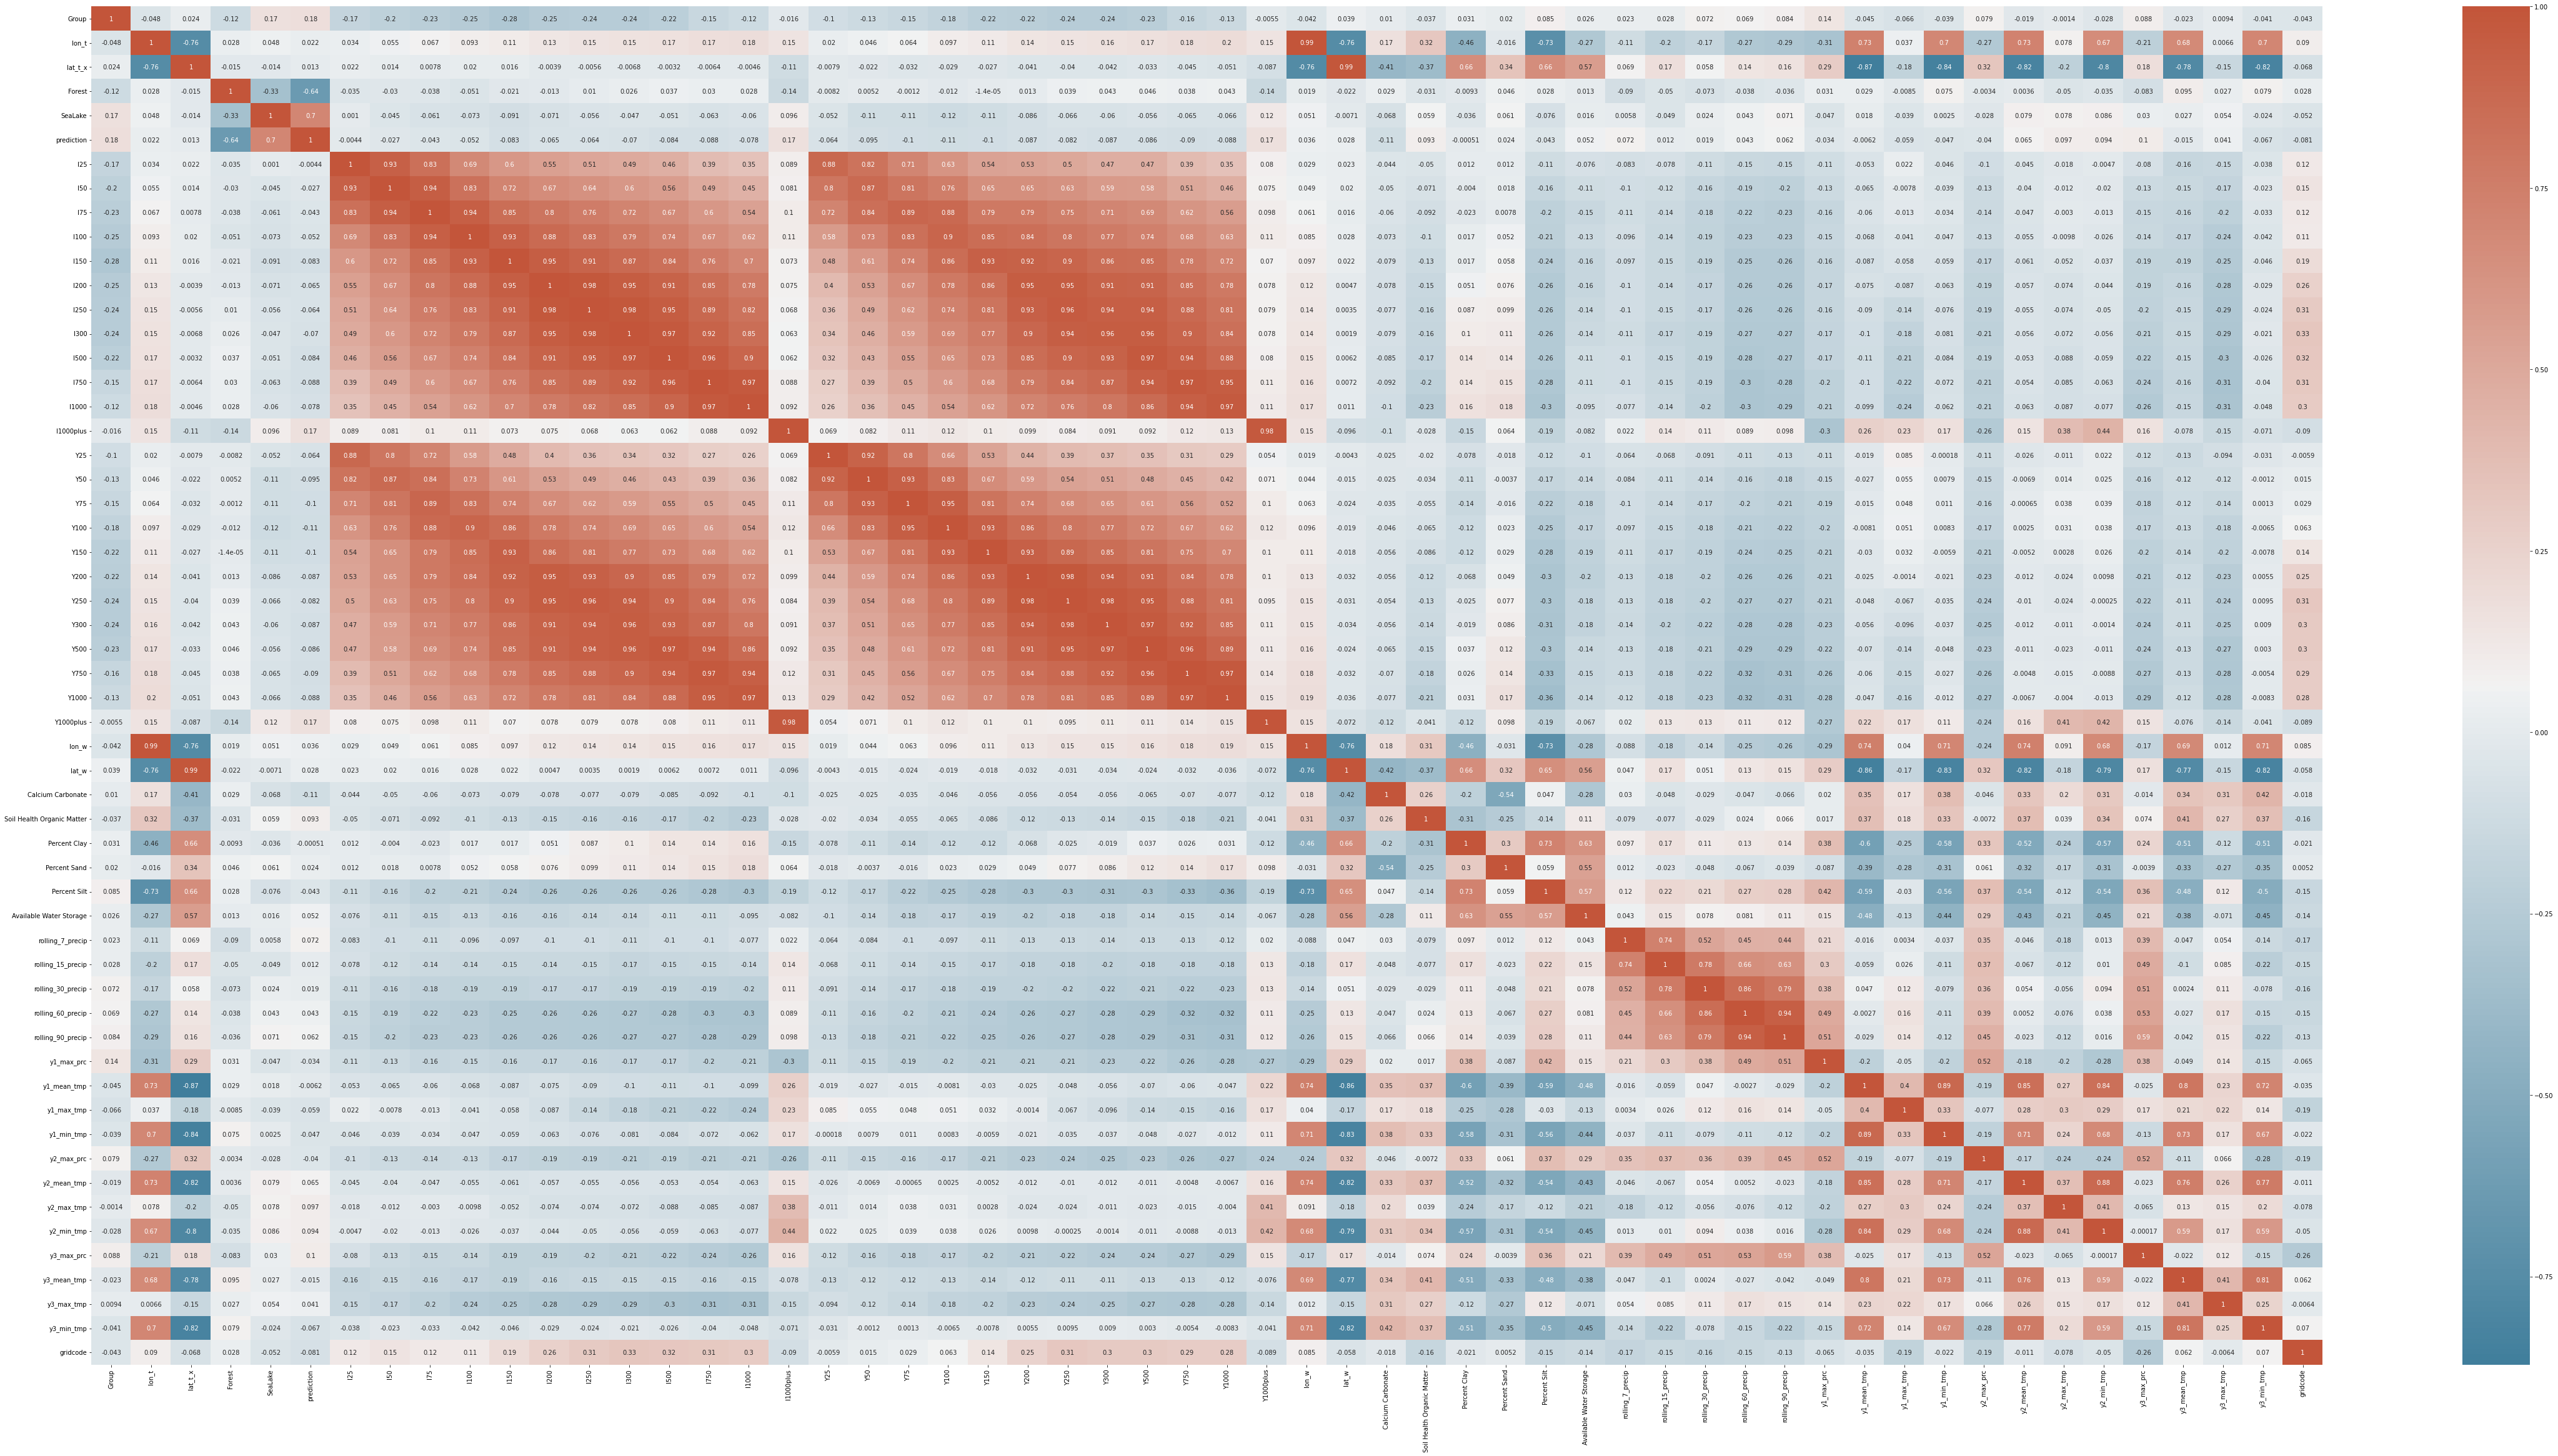

In [ ]:
# Plot correlation matrix result
plt.figure(figsize=(80,40))
sns.heatmap(corr_365, annot=True, cmap=custom_map)
plt.show()

#### Create UDF to extract highly correlated features

In [ ]:
# Create UDF to extract features that meet or are above specified correlation threshold
def extract_correlated_features(dataset, threshold):
  col_corr = set() # Create empty set
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
# Find features above correlation threshold = 0.7
corr_365_features = extract_correlated_features(X_365_no_constant, 0.7)
len(set(corr_365_features))

37

In [ ]:
# Features highly correlated with each other
corr_365_features

{'Percent Silt',
 'Y100',
 'Y1000',
 'Y1000plus',
 'Y150',
 'Y200',
 'Y25',
 'Y250',
 'Y300',
 'Y50',
 'Y500',
 'Y75',
 'Y750',
 'l100',
 'l1000',
 'l150',
 'l200',
 'l250',
 'l300',
 'l50',
 'l500',
 'l75',
 'l750',
 'lat_t_x',
 'lat_w',
 'lon_w',
 'prediction',
 'rolling_15_precip',
 'rolling_30_precip',
 'rolling_60_precip',
 'rolling_90_precip',
 'y1_mean_tmp',
 'y1_min_tmp',
 'y2_mean_tmp',
 'y2_min_tmp',
 'y3_mean_tmp',
 'y3_min_tmp'}

#### Remove highly correlated features

In [ ]:
X_365_train_no_constant_no_correlation = X_365_no_constant.drop(labels = corr_365_features, axis=1)

In [ ]:
X_365_train_no_constant_no_correlation.columns

Index(['Group', 'lon_t', 'Forest', 'SeaLake', 'l25', 'l1000plus',
       'Calcium Carbonate', 'Soil Health Organic Matter', 'Percent Clay',
       'Percent Sand', 'Available Water Storage', 'rolling_7_precip',
       'y1_max_prc', 'y1_max_tmp', 'y2_max_prc', 'y2_max_tmp', 'y3_max_prc',
       'y3_max_tmp', 'gridcode'],
      dtype='object')

In [ ]:
new_corr_365 = X_365_train_no_constant_no_correlation.corr()

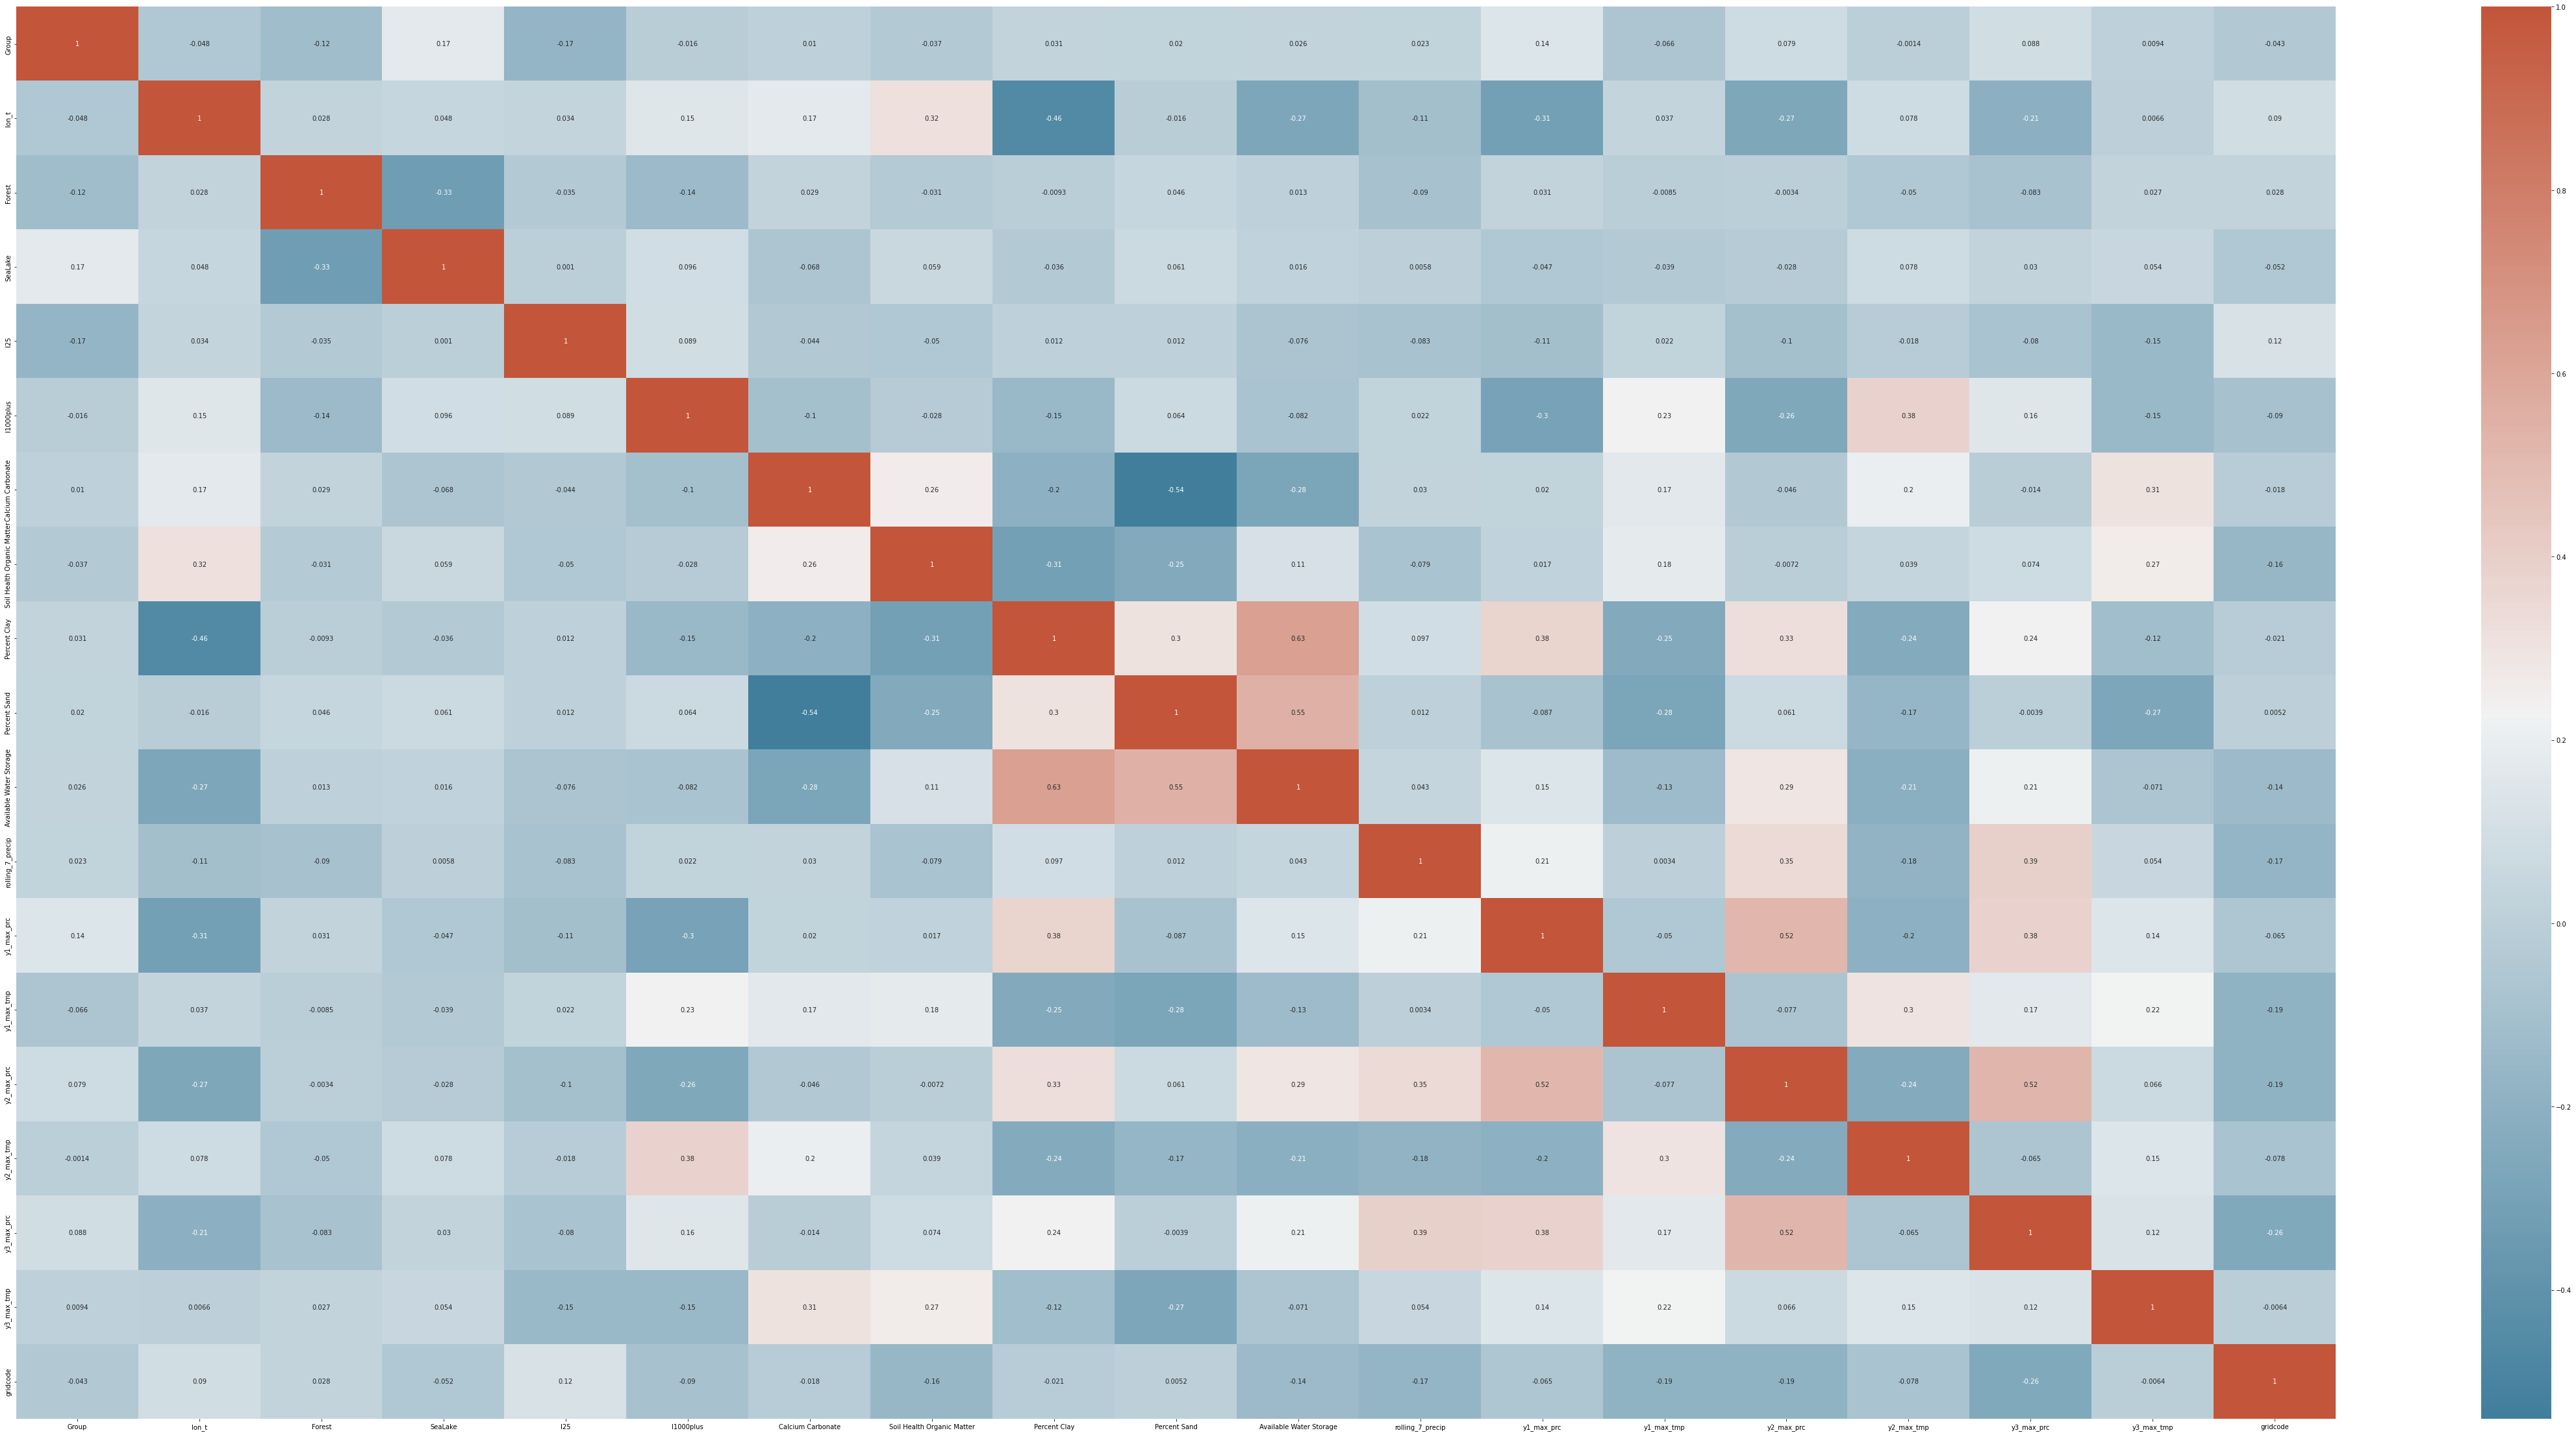

In [ ]:
# Plot new correlation matrix result after highly correlated features are dropped
plt.figure(figsize=(80,40))
sns.heatmap(new_corr_365, annot=True, cmap=custom_map)
plt.show()

In [ ]:
new_corr_365.columns

Index(['Group', 'lon_t', 'Forest', 'SeaLake', 'l25', 'l1000plus',
       'Calcium Carbonate', 'Soil Health Organic Matter', 'Percent Clay',
       'Percent Sand', 'Available Water Storage', 'rolling_7_precip',
       'y1_max_prc', 'y1_max_tmp', 'y2_max_prc', 'y2_max_tmp', 'y3_max_prc',
       'y3_max_tmp', 'gridcode'],
      dtype='object')

In [ ]:
X_365_train_no_constant_no_correlation.head(3)

,Group,lon_t,Forest,SeaLake,l25,l1000plus,Calcium Carbonate,Soil Health Organic Matter,Percent Clay,Percent Sand,Available Water Storage,rolling_7_precip,y1_max_prc,y1_max_tmp,y2_max_prc,y2_max_tmp,y3_max_prc,y3_max_tmp,gridcode
0,0,-82.767929,0.000242,0.007775,0,3860,0.262,0.60295,1.3380,41.9382,6.77495,0.00,0.00,87.5,0.00,85.0,0.00,88.1,2
1,0,-82.131160,0.140954,0.011397,1,3866,0.000,2.23378,13.5854,77.7463,17.80025,1.02,1.68,84.8,5.27,86.5,2.66,84.4,1
2,0,-85.703545,0.895375,0.000709,0,3762,0.000,0.51260,13.3483,76.3181,18.38893,0.47,4.73,84.6,3.36,84.1,3.98,85.2,1


In [ ]:
# Reduced set of features after reduction of constant features and highly correlated features
set(X_365_train_no_constant_no_correlation)

{'Available Water Storage',
 'Calcium Carbonate',
 'Forest',
 'Group',
 'Percent Clay',
 'Percent Sand',
 'SeaLake',
 'Soil Health Organic Matter',
 'gridcode',
 'l1000plus',
 'l25',
 'lon_t',
 'rolling_7_precip',
 'y1_max_prc',
 'y1_max_tmp',
 'y2_max_prc',
 'y2_max_tmp',
 'y3_max_prc',
 'y3_max_tmp'}

In [ ]:
# Number of features (after dropping constants and highly correlated features)
len(set(X_365_train_no_constant_no_correlation))

19